In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats

In [21]:
#%cd /Volumes/UNI/Densmaps_NewVersion4/Results_NewVersion4
%cd /Users/burbol2/Desktop/NewVersion4_copies_delete
#%cd /Users/burbol2/Dropbox/Apps/Computable/Final_Results_CAngles
#%cd /home/eixeres/Dropbox/Apps/Computable/Final_Results_CAngles

/Users/burbol2/Desktop/NewVersion4_copies_delete


In [22]:
percentages = [5, 21, 25, 41]
Waters=[2000, 3000, 4000, 5000, 6500, 7000, 8000, 9000]

mac_theta_WaterPeak = np.zeros(len(percentages))
#mac_theta_MiddlePoint = np.zeros(len(percentages))
mac_theta_SAMPeak = np.zeros(len(percentages))
sigma_WaterPeak = np.zeros(len(percentages))
#sigma_MiddlePoint = np.zeros(len(percentages))
sigma_SAMPeak = np.zeros(len(percentages))

# In the following dictionaries we will save the raw input data
angles_WaterPeak = {}
#angles_MiddlePoint = {}
angles_SAMPeak = {}
radii_WaterPeak = {}
#radii_MiddlePoint = {}
radii_SAMPeak = {}

# In the following dictionaries we will save the results for the cos(theta) and 1/r_base, and their errorbars. 
# We will call them the "results-dictionaries"
theta_WaterPeak = {}
rbase_WaterPeak = {}
errortheta_WaterPeak = {}
errorr_base_WaterPeak = {}

#theta_MiddlePoint = {}
#rbase_MiddlePoint = {}
#errortheta_MiddlePoint = {}
#errorr_base_MiddlePoint = {}

theta_SAMPeak = {}
rbase_SAMPeak = {}
errortheta_SAMPeak = {}
errorr_base_SAMPeak = {}


# For each surface we will store 10 results corresponding to the 10 droplets in each system. This means that in every 
# entry of the "results-dictionaries" we will store a list of 10 elements. Thus, now we store in them lists with 10 zeros. 

for system in percentages:

    theta_WaterPeak[system] = np.zeros(len(Waters))
    rbase_WaterPeak[system] = np.zeros(len(Waters))
    errortheta_WaterPeak[system] = np.zeros(len(Waters))
    errorr_base_WaterPeak[system] = np.zeros(len(Waters))

    #theta_MiddlePoint[system] = np.zeros(len(Waters))
    #rbase_MiddlePoint[system] = np.zeros(len(Waters))
    #errortheta_MiddlePoint[system] = np.zeros(len(Waters))
    #errorr_base_MiddlePoint[system] = np.zeros(len(Waters))

    theta_SAMPeak[system] = np.zeros(len(Waters))
    rbase_SAMPeak[system] = np.zeros(len(Waters))
    errortheta_SAMPeak[system] = np.zeros(len(Waters))
    errorr_base_SAMPeak[system] = np.zeros(len(Waters))

In [23]:
# We create an array named "t" with the time values. We use the length of the longest simulation.

maxlength=100 #maximum length in ns
t = np.zeros(2*maxlength)
i=0
for d in frange(0, maxlength, 0.5,closed=0):
    t[i] = d
    i = i + 1

In [24]:
# We save the data in the arrays "theta_all" and "rbase_all"
SAMs=[5,21,25,41] # Here we use only the SAMs with Contact Angles. Not the systems with complete wetting.

# Here we create two dictionaries named "angles" and "radii". Each dictionary consists of a set of "key: value" pairs, each one corresponding to a different system. The keys are (also) a pair of numbers "b, c".
# "b" refers to the OH-coverage percentage of the SAM, and "c" to the number of water molecules of the droplet. For example, the key "5, 1000" refers to the system with a surface with 5% OH-coverage, 
# and a droplet with 1000 water molecules. The value corresponding to each key is an array with the 40 calculated angles/base radii, that belong to that system. For example: "radii[(11, 3000)]" would give back
# the array with the 40 calculated values of the base radii corresponding to the system with a surface with 11% OH-coverage, and a droplet with 3000 water molecules.

for b in SAMs:
    theta_WaterPeak_data, rbase_WaterPeak_data = np.loadtxt('Contact_Angles2_WaterPeak_s'+str(b)+'.txt', skiprows=2, usecols = (0,1),unpack=True)
    #theta_MiddlePoint_data, rbase_MiddlePoint_data = np.loadtxt('Contact_Angles2_MiddlePoint_s'+str(b)+'.txt', skiprows=2, usecols = (0,1),unpack=True)
    theta_SAMPeak_data, rbase_SAMPeak_data = np.loadtxt('Contact_Angles2_SAM_last_C_atom_s'+str(b)+'.txt', skiprows=2, usecols = (0,1),unpack=True)
    print "SAM=", b, len(theta_WaterPeak_data), len(rbase_WaterPeak_data),len(theta_SAMPeak_data), len(rbase_SAMPeak_data)
    #len(theta_MiddlePoint_data), len(rbase_MiddlePoint_data),
    k = 0
    for c in Waters:
        # First data with z=0 at the first water peak
        z = b, c
        th = [0] *(2*maxlength)
        r = [0] *(2*maxlength)
        i=k*(2*maxlength)
        j=(k+1)*(2*maxlength)
        #print "z=", z, "i=", i, "j=", j
        m = 0
        for l in range(i,j):
            th[m]=theta_WaterPeak_data[l]
            r[m]=rbase_WaterPeak_data[l]
            m = m +1
        angles_WaterPeak[z] = th
        radii_WaterPeak[z] = r
        
        ## Then data with z=0 at the middle point
        #th = [0] *(2*maxlength)
        #r = [0] *(2*maxlength)
        #m=0
        #for l in range(i,j):
        #    th[m]=theta_MiddlePoint_data[l]
        #    r[m]=rbase_MiddlePoint_data[l]
        #    m = m +1
        #angles_MiddlePoint[z] = th
        #radii_MiddlePoint[z] = r
        
        # Lastly data with z=0 at the last SAM peak
        th = [0] *(2*maxlength)
        r = [0] *(2*maxlength)
        m=0
        for l in range(i,j):
            th[m]=theta_SAMPeak_data[l]
            r[m]=rbase_SAMPeak_data[l]
            m = m +1
        angles_SAMPeak[z] = th
        radii_SAMPeak[z] = r
        
        k=k+1

SAM= 5 1600 1600 1600 1600
SAM= 21 1600 1600 1600 1600
SAM= 25 1600 1600 1600 1600
SAM= 41 1600 1600 1600 1600


In [25]:
# Here we define functions needed later

# func is the function of a line, that will be used in the linear fits
def func(x, a, b):
    return a*x + b

# The following functions will be used to calculate the block averages and the errorbars
# The function naive_variance will only be used inside the function blockAverage
def naive_variance(data):
    n = 0
    Sum = 0
    Sum_sqr = 0
 
    for x in data:
        n = n + 1
        Sum = Sum + x
        Sum_sqr = Sum_sqr + x*x
 
    variance = (Sum_sqr - (Sum*Sum)/n)/(n - 1)
    return variance

def blockAverage(datastream, Nblocks):
    
    # FIRST WE CREATE AN ARRAY TO STORE THE MEAN VALUES OF THE DATA BLOCKS (blockMean)
    blockMean = np.zeros(Nblocks)  
        
    # Nobs is the number of points (observations) in our data
    Nobs = len(datastream) 
    # BlockSize is the size of each block of data
    BlockSize = int(Nobs//Nblocks) 
    
    if Nblocks==1:
        errorbar = naive_variance(datastream)
        return errorbar

    else:
       # WE CALCULATE IN A LOOP THE MEAN VALUES OF EACH DATA BLOCK (blockMean)
        for i in range(0,Nblocks-1):
            ibeg = i*BlockSize
            iend = (i+1)*BlockSize
            blockMean[i] = mean(datastream[ibeg:iend])
        # WE TREAT THE LAST BLOCK SEPARATELY, BECAUSE WE HAVE TO TAKE INTO ACCOUNT THE POSSIBLE REMAINING POINTS 
        # WHEN THE NUMBER OF DATA POINTS ISN'T A MULTIPLE OF THE NUMBER OF BLOCKS
        ibeg = (Nblocks-1)*BlockSize
        iend = Nobs
        blockMean[Nblocks-1] = mean(datastream[ibeg:iend])
     
        errorbar = (np.std(blockMean))/sqrt(Nblocks -1) #np.std(blockMean) is the standard deviation of blockmean
        simulavr = mean(blockMean)
        return simulavr, errorbar


#endpoint returns the integer "end": the last data point different then "nan"
def endpoint(theta):
	for end in range(20, len(theta)):
    	 if math.isnan(theta[end]):
        	break
	return end

#best_start SEARCHS FOR THE STARTING POINT (start) OF THE BEST TIME INTERVAL TO GET THE SMALLEST ERROR IN THE CONTACT ANGLE COSINUS
def best_start(theta,rbase,t,omitstart,fixend):

	endblocks = endpoint(theta) -fixend

	error = np.zeros(endblocks-omitstart) #error will be the total error (of all the points taken each time we choose a different set of data to make the blocks)
	average = np.zeros(endblocks-omitstart) # average is the same, but for the average
	error = error.tolist()
	j=0
	# Loop for finding the "best" interval to do the block averaging
	for i in range (omitstart, endblocks):
    	 average[j],error[j] = blockAverage((theta[i:end]),3)   
    	 #print "j= ", j , "i=", i, "end=", end, "error =", error[j] 
    	 error[j] = sin(radians(average[j]))*radians(error[j])
    	 j = j+1  
	bestblock = error.index(min(error))
	start = bestblock + omitstart
	return start


	# ONCE WE HAVE THE "BEST" INTERVAL WE CALCULATE THE AVERAGE AND ERRORBAR OF theta AND rbase
def avr_and_error(start,end,theta,rbase):
	#FIRST FOR theta
	t_average, t_error = blockAverage((theta[start:end]),3)  
	errortheta = sin(radians(t_average))*radians(t_error)
	theta_avr = t_average*np.ones(end - start)

	# WE DO THE SAME FOR r_base (AVERAGE AND ERRORBAR)
	r_average, r_error = blockAverage((rbase[start:end]),3)
	errorr_base = (1/(r_average**2))*r_error
	rbase_avr = r_average*np.ones(end - start)
	
	# t_avr is the time interval correponding to the interval used for the average (it is needed for plotting the average)
	t_avr = t[start:end]

	# The first resturned values (errortheta, errorr_base, t_average and r_average) are floating numbers. The last ones (theta_avr, rbase_avr and t_avr) are lists.
	return errortheta,errorr_base,t_average,r_average,theta_avr,rbase_avr,t_avr 

In [26]:
omitstart=10 #number of points at the beggining which shouldn't be taken into account to buid the average value
fixend=20 #number of points fixed at the end, so that when doing the block average the total interval doesn't get too small 

RESULTS WATER PEAK 126.973602363 1.99510906085
RESULTS SAM PEAK 137.867056661 1.67547473181


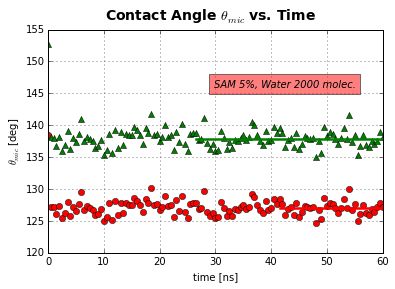

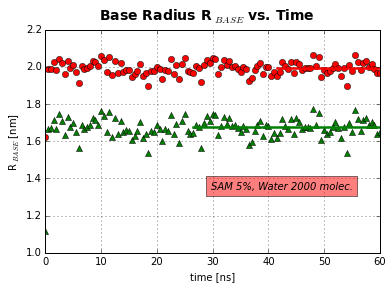

In [27]:
#####################   ANALYSIS   #####################

b=5
c=2000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

RESULTS WATER PEAK 131.287786345 2.11332737093
RESULTS SAM PEAK 141.585125471 1.7476796193


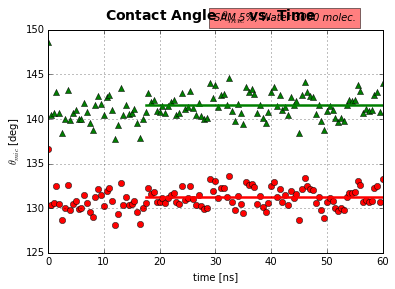

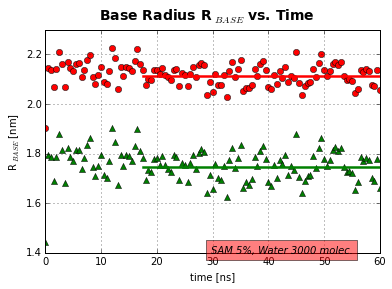

In [28]:
#####################   ANALYSIS   #####################

b=5
c=3000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

RESULTS WATER PEAK 123.119086776 2.65135509067
RESULTS SAM PEAK 131.030104726 2.38816474731


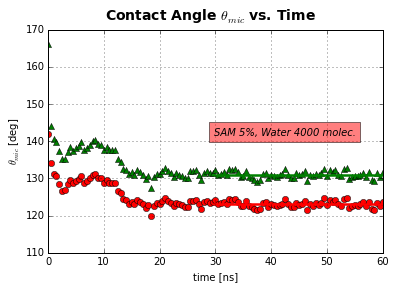

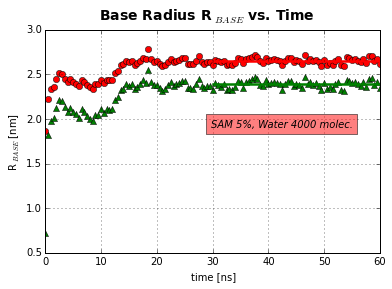

In [29]:
#####################   ANALYSIS   #####################

b=5
c=4000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

RESULTS WATER PEAK 126.52335787 2.71202176439
RESULTS SAM PEAK 134.300595548 2.41536817803


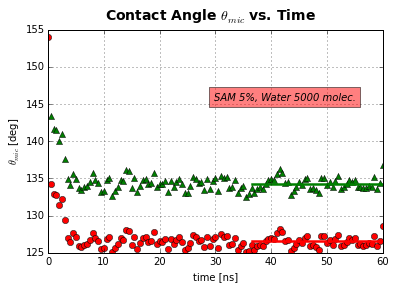

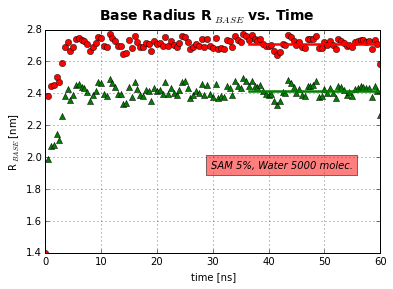

In [30]:
#####################   ANALYSIS   #####################

b=5
c=5000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

RESULTS WATER PEAK 129.697593329 2.82872431783
RESULTS SAM PEAK 137.164095425 2.49984994739


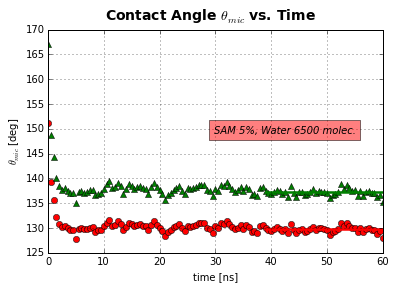

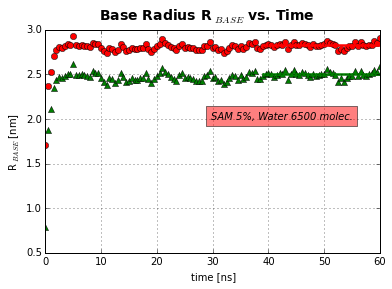

In [31]:
#####################   ANALYSIS   #####################

b=5
c=6500
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

RESULTS WATER PEAK 130.860942485 2.83462039951
RESULTS SAM PEAK 138.348427127 2.49105729252


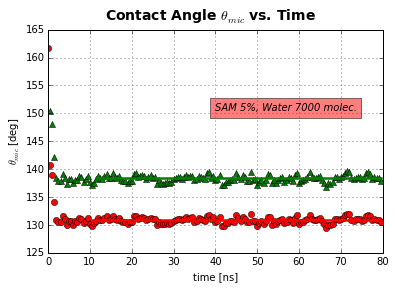

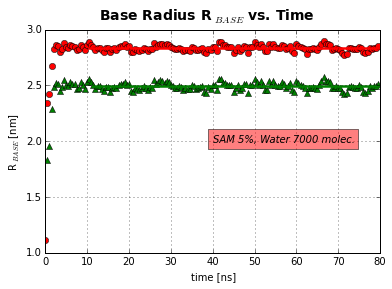

In [32]:
#####################   ANALYSIS   #####################

b=5
c=7000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

RESULTS WATER PEAK 132.385791917 2.88876272994
RESULTS SAM PEAK 139.760476986 2.52656942649


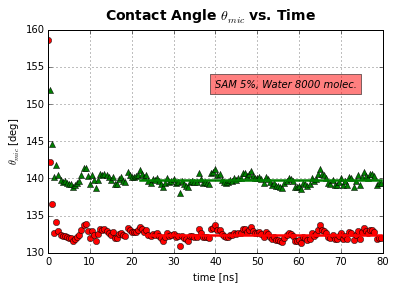

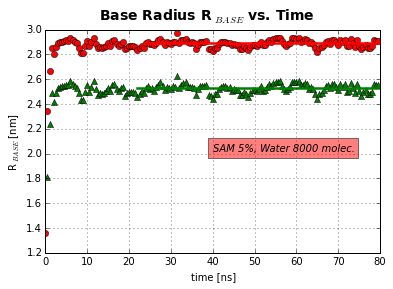

In [33]:
#####################   ANALYSIS   #####################

b=5
c=8000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

RESULTS WATER PEAK 134.191596868 2.9158429423
RESULTS SAM PEAK 141.533365987 2.53003939044


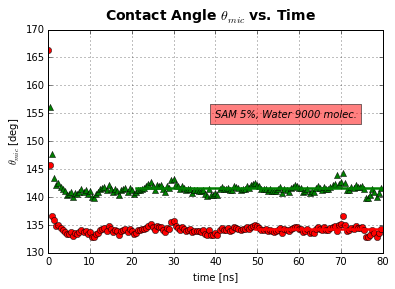

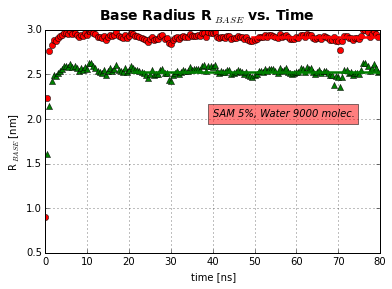

In [34]:
#####################   ANALYSIS   #####################

b=5
c=9000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

RESULTS WATER PEAK 84.9485277115 3.16086784871
RESULTS SAM PEAK 87.5188332245 3.17022516579


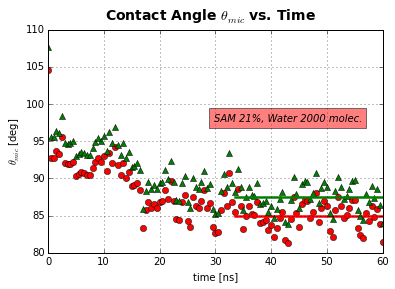

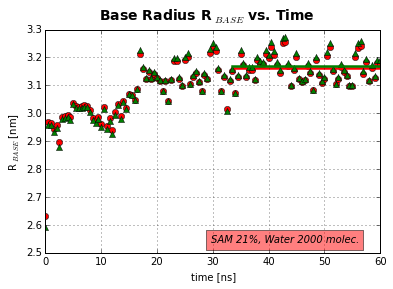

In [35]:
#####################   ANALYSIS   #####################

b=21
c=2000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

RESULTS WATER PEAK 89.6569095282 3.45338518664
RESULTS SAM PEAK 92.0137559485 3.45131335122


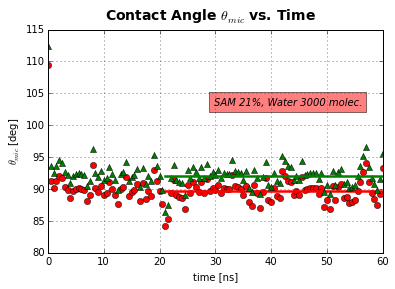

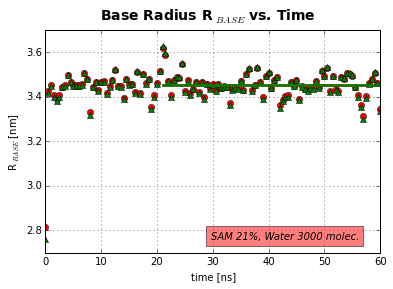

In [36]:
#####################   ANALYSIS   #####################

b=21
c=3000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

RESULTS WATER PEAK 93.029717309 3.70961571775
RESULTS SAM PEAK 95.2260575505 3.69936138831


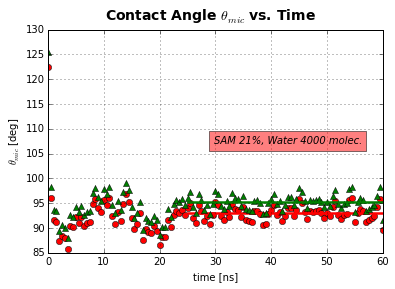

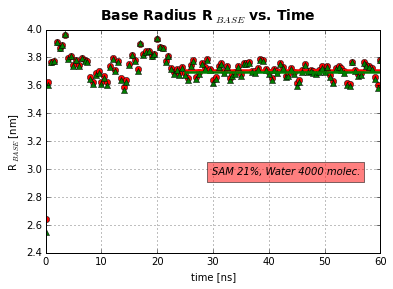

In [37]:
#####################   ANALYSIS   #####################

b=21
c=4000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

RESULTS WATER PEAK 88.5353528012 4.15695273231
RESULTS SAM PEAK 90.4924152664 4.15815836733


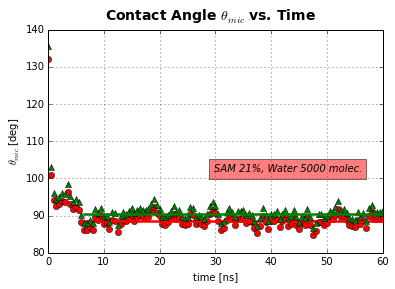

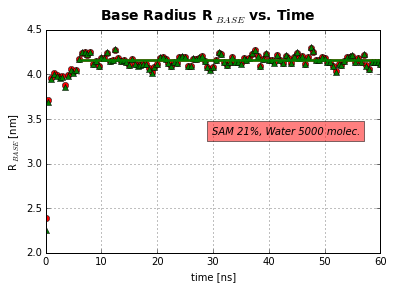

In [38]:
#####################   ANALYSIS   #####################

b=21
c=5000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

RESULTS WATER PEAK 93.1728784998 4.37388792397
RESULTS SAM PEAK 95.0352719502 4.36369423314


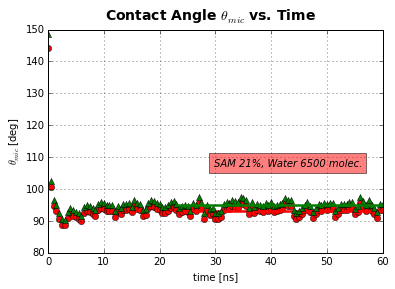

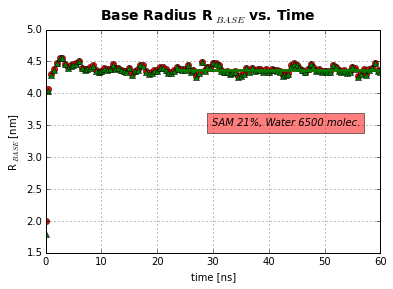

In [39]:
#####################   ANALYSIS   #####################

b=21
c=6500
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [40]:
#####################   ANALYSIS   #####################

b=21
c=7000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

ValueError: negative dimensions are not allowed

In [ ]:
#####################   ANALYSIS   #####################

b=21
c=8000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=21
c=9000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=25
c=2000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
#plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
#plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=25
c=3000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=25
c=4000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=25
c=5000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=25
c=6500
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=25
c=7000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=25
c=8000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=25
c=9000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=41
c=2000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
#plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
#plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=41
c=3000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=41
c=4000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=41
c=5000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=41
c=6500
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=41
c=7000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=41
c=8000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
#####################   ANALYSIS   #####################

b=41
c=9000
n=Waters.index(c)

#maxlength=100 #maximum length in ns --> CHANGE ONLY IF DATA IN RESULTS FILE IS SHORTER!!

###### Analysis of data with FIRST WATER PEAK as z=0 ######
theta_WaterPeak2 = array(angles_WaterPeak[(b, c)])
rbase_WaterPeak2 = array(radii_WaterPeak[(b, c)])

end = endpoint(theta_WaterPeak2)
start = best_start(theta_WaterPeak2,rbase_WaterPeak2,t,omitstart,fixend)
errortheta_WaterPeak[b][n],errorr_base_WaterPeak[b][n],theta_WaterPeak[b][n],rbase_WaterPeak[b][n],theta_avr_WaterPeak,rbase_avr_WaterPeak,t_avr_WaterPeak = avr_and_error(start,end,theta_WaterPeak2,rbase_WaterPeak2)

####### Analysis of data with MIDDLE POINT as z=0 ######
#
#theta_MiddlePoint2 = array(angles_MiddlePoint[(b, c)])
#rbase_MiddlePoint2 = array(radii_MiddlePoint[(b, c)])
#
#end = endpoint(theta_MiddlePoint2)
#start = best_start(theta_MiddlePoint2,rbase_MiddlePoint2,t,omitstart,fixend)
#errortheta_MiddlePoint[b][n],errorr_base_MiddlePoint[b][n],theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n],theta_avr_MiddlePoint,rbase_avr_MiddlePoint,t_avr_MiddlePoint = avr_and_error(start,end,theta_MiddlePoint2,rbase_MiddlePoint2)
#
####### Analysis of data with LAST SAM PEAK as z=0 ######

theta_SAMPeak2 = array(angles_SAMPeak[(b, c)])
rbase_SAMPeak2 = array(radii_SAMPeak[(b, c)])

end = endpoint(theta_SAMPeak2)
start = best_start(theta_SAMPeak2,rbase_SAMPeak2,t,omitstart,fixend)
errortheta_SAMPeak[b][n],errorr_base_SAMPeak[b][n],theta_SAMPeak[b][n],rbase_SAMPeak[b][n],theta_avr_SAMPeak,rbase_avr_SAMPeak,t_avr_SAMPeak = avr_and_error(start,end,theta_SAMPeak2,rbase_SAMPeak2)

print "RESULTS WATER PEAK",theta_WaterPeak[b][n],rbase_WaterPeak[b][n]
#print "RESULTS MIDDLE POINT", theta_MiddlePoint[b][n],rbase_MiddlePoint[b][n]
print "RESULTS SAM PEAK", theta_SAMPeak[b][n],rbase_SAMPeak[b][n]

#####################   PLOTS   #####################

#name of the output plots
nametheta = "thetas%sw%s.png" % (b,c)
namebaserad = "rads%sw%s.png" % (b,c)

t2=t[0:maxlength*2] # This line was added for the cases where the simulations are shorter

#text position in Contact Angle plot
xtext = float((end/2)-(0.25*end))
ytext = float(1.15*theta_WaterPeak[b][n]) 

# Plot of CONTACT ANGLE of data with FIRST WATER PEAK as z=0 
plt.plot(t2,theta_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, theta_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of CONTACT ANGLE of data with MIDDLE POINT as z=0 
#plt.plot(t2,theta_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, theta_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of CONTACT ANGLE of data with LAST SAM PEAK as z=0 
plt.plot(t2,theta_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, theta_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'$\theta_{mic}$ [deg]')
plt.suptitle(r'Contact Angle $\theta_{mic}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 125, 180])
pylab.savefig(nametheta)
plt.show()


#text position in Base Radius plot
xtext = float((end/2)-(0.25*end))
ytext = float(0.8*rbase_SAMPeak[b][n])
#ytext = float(rbase_SAMPeak[b][n]-(rbase_SAMPeak[b][n]*0.1))

# Plot of BASE RADIUS of data with FIRST WATER PEAK as z=0 
plt.plot(t2,rbase_WaterPeak2,'ro')
plt.plot(t_avr_WaterPeak, rbase_avr_WaterPeak, linewidth=2.5,color='r')

## Plot of BASE RADIUS of data with MIDDLE POINT as z=0 
#plt.plot(t2,rbase_MiddlePoint2,'bs')
#plt.plot(t_avr_MiddlePoint, rbase_avr_MiddlePoint, linewidth=2.5,color='b')

# Plot of BASE RADIUS of data with LAST SAM PEAK as z=0 
plt.plot(t2,rbase_SAMPeak2,'g^')
plt.plot(t_avr_SAMPeak, rbase_avr_SAMPeak, linewidth=2.5,color='g')

plt.xlabel('time [ns]')
plt.ylabel(r'R$\ _{BASE} $ [nm]')
plt.suptitle(r'Base Radius R$\ _{BASE}$ vs. Time', fontsize=14, fontweight='bold')
#plt.title(r'Contact Angle $\theta_{mic}$ vs. Time')
plt.text(xtext, ytext, 'SAM '+str(b)+'%, Water '+str(c)+' molec.',style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.grid(True)
#plt.axis([0, 40, 0, 1.7])
pylab.savefig(namebaserad)
plt.show()

In [ ]:
firstpt = 0
lastpt = 5
b = 5
#print rbase_SAMPeak[b][firstpt:lastpt]
#print rbase_SAMPeak[b][6:8]
#print theta_SAMPeak[b][firstpt:lastpt]
#print errortheta_SAMPeak[b][firstpt:lastpt]
#print errorr_base_SAMPeak[b][firstpt:lastpt]

print "  "
print rbase_SAMPeak[b]
print theta_SAMPeak[b]
print "  "
print errortheta_SAMPeak[b]
print errorr_base_SAMPeak[b]

In [ ]:
""""
# RUN ONLY ONCE!!
# THIS CELL REMOVES FROM THE ARRAYS THE SYSTEMS NOT ANALYSED
b = 5
dummy = list(rbase_SAMPeak[b][0:5]) + list(rbase_SAMPeak[b][6:8])
rbase_SAMPeak[b] = array(dummy)

dummy = list(theta_SAMPeak[b][0:5]) + list(theta_SAMPeak[b][6:8])
theta_SAMPeak[b] = array(dummy)

dummy = list(errortheta_SAMPeak[b][0:5]) + list(errortheta_SAMPeak[b][6:8])
errortheta_SAMPeak[b] = array(dummy)

dummy = list(errorr_base_SAMPeak[b][0:5]) + list(errorr_base_SAMPeak[b][6:8])
errorr_base_SAMPeak[b] = array(dummy)
""""

In [ ]:
# RUN ONLY ONCE!!
# THIS CELL REMOVES FROM THE ARRAYS THE SYSTEMS NOT ANALYSED
b = 5
dummy = list(rbase_WaterPeak[b][0:5]) + list(rbase_WaterPeak[b][6:8])
rbase_SAMPeak[b] = array(dummy)

dummy = list(theta_WaterPeak[b][0:5]) + list(theta_WaterPeak[b][6:8])
theta_SAMPeak[b] = array(dummy)

dummy = list(errortheta_SAMPeak[b][0:5]) + list(errortheta_WaterPeak[b][6:8])
errortheta_SAMPeak[b] = array(dummy)

dummy = list(errorr_base_SAMPeak[b][0:5]) + list(errorr_base_WaterPeak[b][6:8])
errorr_base_SAMPeak[b] = array(dummy)

In [ ]:
b = 5
namethetabaserad = "theta_r_s%s.png" % (b)
surface=percentages.index(b)
    
#First System to take into account (smallest droplet is number 0, the second smallest is number 1, etc.)
firstpt = 0
#Last System to take into account (biggest droplet is number 9, the second biggest is number 8, etc.). Always add 1!
lastpt = 9

############################ TESTING ############################

#print "TESTING values WaterPeak: "
#print "errortheta_WaterPeak[b]",  errortheta_WaterPeak[b]
#print "errorr_base_WaterPeak[b]", errorr_base_WaterPeak[b]
#print "theta_WaterPeak[b]", theta_WaterPeak[b]
#print "rbase_WaterPeak[b]", rbase_WaterPeak[b]

#print "TESTING values MiddlePoint: "
#print "errortheta_MiddlePoint[b]", errortheta_MiddlePoint[b]
#print "errorr_base_MiddlePoint[b]", errorr_base_MiddlePoint[b]
#print "theta_MiddlePoint[b]", theta_MiddlePoint[b]
#print "rbase_MiddlePoint[b]", rbase_MiddlePoint[b]

#print "TESTING values SAMPeak: "
#print "errortheta_SAMPeak[b]", errortheta_SAMPeak[b]
#print "errorr_base_SAMPeak[b]", errorr_base_SAMPeak[b]
#print "theta_SAMPeak[b]", theta_SAMPeak[b]
#print "rbase_SAMPeak[b]", rbase_SAMPeak[b]

############## RESULTS WATER PEAK  ##############

x_WaterPeak = 1/rbase_WaterPeak[b][firstpt:lastpt]
y_WaterPeak = cos(radians(theta_WaterPeak[b][firstpt:lastpt]))
error_y_WaterPeak = errortheta_WaterPeak[b][firstpt:lastpt]
error_x_WaterPeak = errorr_base_WaterPeak[b][firstpt:lastpt]

slope_WaterPeak, intercept_WaterPeak, r_value_WaterPeak, p_value_WaterPeak, std_err_WaterPeak = stats.linregress(x_WaterPeak,y_WaterPeak)

#print "TESTING: ", x_WaterPeak,y_WaterPeak, error_y_WaterPeak, error_x_WaterPeak

print "Line equation: a*x+b with a=", slope_WaterPeak, "and b=", intercept_WaterPeak
mac_theta_WaterPeak[surface] = math.degrees(np.arccos(intercept_WaterPeak))
sigma_WaterPeak[surface] = slope_WaterPeak*(-52.7)

#txt_WaterPeak = "$\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN" % (int(mac_theta_WaterPeak[surface]*100)/100.00,int(sigma_WaterPeak[surface]*100)/100.00)
txt_WaterPeak = "Water peak: $\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN\n" % (round(mac_theta_WaterPeak[surface]),round(sigma_WaterPeak[surface],2))

############### RESULTS MIDDLE POINT  ##############
#
#x_MiddlePoint = 1/rbase_MiddlePoint[b][firstpt:lastpt]
#y_MiddlePoint = cos(radians(theta_MiddlePoint[b][firstpt:lastpt]))
#error_y_MiddlePoint = errortheta_MiddlePoint[b][firstpt:lastpt]
#error_x_MiddlePoint = errorr_base_MiddlePoint[b][firstpt:lastpt]
#
#slope_MiddlePoint, intercept_MiddlePoint, r_value_MiddlePoint, p_value_MiddlePoint, std_err_MiddlePoint = stats.linregress(x_MiddlePoint,y_MiddlePoint)
#
##print "TESTING: ", x_MiddlePoint, y_MiddlePoint, error_y_MiddlePoint, error_x_MiddlePoint
#
#print "Line equation: a*x+b with a=", slope_MiddlePoint, "and b=", intercept_MiddlePoint
#mac_theta_MiddlePoint[surface] = math.degrees(np.arccos(intercept_MiddlePoint))
#sigma_MiddlePoint[surface] = slope_MiddlePoint*(-52.7)
#
##txt_MiddlePoint = "$\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN" % (int(mac_theta_MiddlePoint[surface]*100)/100.00,int(sigma_MiddlePoint[surface]*100)/100.00)
#txt_MiddlePoint = "Middle point: $\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN\n" % (round(mac_theta_MiddlePoint[surface]),round(sigma_MiddlePoint[surface],2))
#
#
############### RESULTS SAM PEAK  ##############

x_SAMPeak = 1/rbase_SAMPeak[b][firstpt:lastpt]
y_SAMPeak = cos(radians(theta_SAMPeak[b][firstpt:lastpt]))
error_y_SAMPeak = errortheta_SAMPeak[b][firstpt:lastpt]
error_x_SAMPeak = errorr_base_SAMPeak[b][firstpt:lastpt]

slope_SAMPeak, intercept_SAMPeak, r_value_SAMPeak, p_value_SAMPeak, std_err_SAMPeak = stats.linregress(x_SAMPeak,y_SAMPeak)

#print "TESTING: ", x_SAMPeak, y_SAMPeak, error_y_SAMPeak, error_x_SAMPeak

print "Line equation: a*x+b with a=", slope_SAMPeak, "and b=", intercept_SAMPeak
mac_theta_SAMPeak[surface] = math.degrees(np.arccos(intercept_SAMPeak))
sigma_SAMPeak[surface] = slope_SAMPeak*(-52.7)

#txt_SAMPeak = "$\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN" % (int(mac_theta_SAMPeak[surface]*100)/100.00,int(sigma_SAMPeak[surface]*100)/100.00)
txt_SAMPeak = "SAM peak: $\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN\n" % (round(mac_theta_SAMPeak[surface]),round(sigma_SAMPeak[surface],2))


############## PLOT cos vs 1/r RESULTS (all z=0 definitions together)  ##############

#PLOT for SAM 0% (Also saved to file)
plt.figure()
plt.errorbar(x_WaterPeak, y_WaterPeak,xerr=error_x_WaterPeak, yerr=error_y_WaterPeak,fmt='x', ecolor='red',elinewidth=1.5, color='red',markeredgewidth=1.5)
plt.plot(x_WaterPeak, func(x_WaterPeak, slope_WaterPeak, intercept_WaterPeak),color='r')

#plt.errorbar(x_MiddlePoint, y_MiddlePoint,xerr=error_x_MiddlePoint, yerr=error_y_MiddlePoint,fmt='x', ecolor='blue',elinewidth=1.5, color='black',markeredgewidth=1.5)
#plt.plot(x_MiddlePoint, func(x_MiddlePoint, slope_MiddlePoint, intercept_MiddlePoint),color='b')

plt.errorbar(x_SAMPeak, y_SAMPeak,xerr=error_x_SAMPeak, yerr=error_y_SAMPeak,fmt='x', ecolor='green',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(x_SAMPeak, func(x_SAMPeak, slope_SAMPeak, intercept_SAMPeak),color='g')

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$')
plt.ylabel(r' $\cos\Theta_{mic}$ ')
plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(b)+'%', fontsize=14)

#plt.text(0.7, -0.3, txt_WaterPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
#plt.text(0.7, -0.3, txt_MiddlePoint ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
#plt.text(0.7, -0.3, txt_SAMPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

#The 3 lines of text together:
#plt.text(1.2, -0.85, txt_WaterPeak + txt_MiddlePoint + txt_SAMPeak,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

plt.grid(True)
#plt.axis([0.3, 0.9, -1.0, 0.0])
pylab.savefig(namethetabaserad)
plt.show()

# Printing results:
print "WaterPeak:"
print "Standard Error of Line Regression std_err = ", std_err_WaterPeak
print "Arccos(intercept) = ", degrees(np.arccos(intercept_WaterPeak))
print "Slope*(-52.7) = ", slope_WaterPeak*(-52.7)
# To get coefficient of determination (r_squared)
print "(To get coefficient of determination: r-squared = ", r_value_WaterPeak**2, ")"

#print " "
#print "MiddlePoint:"
#print "Standard Error of Line Regression std_err = ", std_err_MiddlePoint
#print "Arccos(intercept) = ", degrees(np.arccos(intercept_MiddlePoint))
#print "Slope*(-52.7) = ", slope_MiddlePoint*(-52.7)
## To get coefficient of determination (r_squared)
#print "(To get coefficient of determination: r-squared = ", r_value_MiddlePoint**2, ")"

print " "
print "SAMPeak:"
print "Standard Error of Line Regression std_err = ", std_err_SAMPeak
print "Arccos(intercept) = ", degrees(np.arccos(intercept_SAMPeak))
print "Slope*(-52.7) = ", slope_SAMPeak*(-52.7)
print " "
# To get coefficient of determination (r_squared)
print "(To get coefficient of determination: r-squared = ", r_value_SAMPeak**2, ")"

In [ ]:
# BETTER LOOKING PLOT: 
# After running previous cell to get correct values of variable!! Check also the values ranges of the slopes and interceps!!
#change the length of regression lines by changing x new, and the range of the axes (with plt.axis)

xnew = np.arange(-0.1, 1.1, 0.01)

#PLOT for SAM 0% (Also saved to file)
plt.figure()
plt.errorbar(x_WaterPeak, y_WaterPeak,xerr=error_x_WaterPeak, yerr=error_y_WaterPeak,fmt='x', ecolor='red',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(xnew, func(xnew, slope_WaterPeak, intercept_WaterPeak),color='r')

#plt.errorbar(x_MiddlePoint, y_MiddlePoint,xerr=error_x_MiddlePoint, yerr=error_y_MiddlePoint,fmt='x', ecolor='blue',elinewidth=1.5, color='black',markeredgewidth=1.5)
#plt.plot(xnew, func(xnew, slope_MiddlePoint, intercept_MiddlePoint),color='b')

plt.errorbar(x_SAMPeak, y_SAMPeak,xerr=error_x_SAMPeak, yerr=error_y_SAMPeak,fmt='x', ecolor='green',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(xnew, func(xnew, slope_SAMPeak, intercept_SAMPeak),color='g')

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$')
plt.ylabel(r' $\cos\Theta_{mic}$ ')
plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(b)+'%', fontsize=14)

#plt.text(0.7, -0.3, txt_WaterPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
#plt.text(0.7, -0.3, txt_MiddlePoint ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
#plt.text(0.7, -0.3, txt_SAMPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

plt.grid(True)
#plt.axis([-0.1, 1.1, -0.85, -0.55])
pylab.savefig(namethetabaserad)
plt.show()

In [ ]:
b = 21
print "  "
print rbase_SAMPeak[b]
print theta_SAMPeak[b]
print "  "
print errortheta_SAMPeak[b]
print errorr_base_SAMPeak[b]

print rbase_SAMPeak[b][0:5]
print rbase_SAMPeak[b][0:5]
print rbase_SAMPeak[b][7:8]

In [ ]:
# RUN ONLY ONCE!!
# THIS CELL REMOVES FROM THE ARRAYS THE SYSTEMS NOT ANALYSED
""""
dummy = list(rbase_SAMPeak[b][0:5]) + list(rbase_SAMPeak[b][7:8])
rbase_SAMPeak[b] = array(dummy)

dummy = list(theta_SAMPeak[b][0:5]) + list(theta_SAMPeak[b][7:8])
theta_SAMPeak[b] = array(dummy)

dummy = list(errortheta_SAMPeak[b][0:5]) + list(errortheta_SAMPeak[b][7:8])
errortheta_SAMPeak[b] = array(dummy)

dummy = list(errorr_base_SAMPeak[b][0:5]) +  list(errorr_base_SAMPeak[b][7:8])
errorr_base_SAMPeak[b] = array(dummy)
""""

In [ ]:
b = 21
namethetabaserad = "theta_r_s%s.png" % (b)
surface=percentages.index(b)
    
#First System to take into account (smallest droplet is number 0, the second smallest is number 1, etc.)
firstpt = 0
#Last System to take into account (biggest droplet is number 9, the second biggest is number 8, etc.). Always add 1!
lastpt = 9

############################ TESTING ############################

#print "TESTING values WaterPeak: "
#print "errortheta_WaterPeak[b]",  errortheta_WaterPeak[b]
#print "errorr_base_WaterPeak[b]", errorr_base_WaterPeak[b]
#print "theta_WaterPeak[b]", theta_WaterPeak[b]
#print "rbase_WaterPeak[b]", rbase_WaterPeak[b]

#print "TESTING values MiddlePoint: "
#print "errortheta_MiddlePoint[b]", errortheta_MiddlePoint[b]
#print "errorr_base_MiddlePoint[b]", errorr_base_MiddlePoint[b]
#print "theta_MiddlePoint[b]", theta_MiddlePoint[b]
#print "rbase_MiddlePoint[b]", rbase_MiddlePoint[b]

#print "TESTING values SAMPeak: "
#print "errortheta_SAMPeak[b]", errortheta_SAMPeak[b]
#print "errorr_base_SAMPeak[b]", errorr_base_SAMPeak[b]
#print "theta_SAMPeak[b]", theta_SAMPeak[b]
#print "rbase_SAMPeak[b]", rbase_SAMPeak[b]

############## RESULTS WATER PEAK  ##############

x_WaterPeak = 1/rbase_WaterPeak[b][firstpt:lastpt]
y_WaterPeak = cos(radians(theta_WaterPeak[b][firstpt:lastpt]))
error_y_WaterPeak = errortheta_WaterPeak[b][firstpt:lastpt]
error_x_WaterPeak = errorr_base_WaterPeak[b][firstpt:lastpt]

slope_WaterPeak, intercept_WaterPeak, r_value_WaterPeak, p_value_WaterPeak, std_err_WaterPeak = stats.linregress(x_WaterPeak,y_WaterPeak)

#print "TESTING: ", x_WaterPeak,y_WaterPeak, error_y_WaterPeak, error_x_WaterPeak

print "Line equation: a*x+b with a=", slope_WaterPeak, "and b=", intercept_WaterPeak
mac_theta_WaterPeak[surface] = math.degrees(np.arccos(intercept_WaterPeak))
sigma_WaterPeak[surface] = slope_WaterPeak*(-52.7)

#txt_WaterPeak = "$\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN" % (int(mac_theta_WaterPeak[surface]*100)/100.00,int(sigma_WaterPeak[surface]*100)/100.00)
txt_WaterPeak = "Water peak: $\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN\n" % (round(mac_theta_WaterPeak[surface]),round(sigma_WaterPeak[surface],2))

############### RESULTS MIDDLE POINT  ##############
#
#x_MiddlePoint = 1/rbase_MiddlePoint[b][firstpt:lastpt]
#y_MiddlePoint = cos(radians(theta_MiddlePoint[b][firstpt:lastpt]))
#error_y_MiddlePoint = errortheta_MiddlePoint[b][firstpt:lastpt]
#error_x_MiddlePoint = errorr_base_MiddlePoint[b][firstpt:lastpt]
#
#slope_MiddlePoint, intercept_MiddlePoint, r_value_MiddlePoint, p_value_MiddlePoint, std_err_MiddlePoint = stats.linregress(x_MiddlePoint,y_MiddlePoint)
#
##print "TESTING: ", x_MiddlePoint, y_MiddlePoint, error_y_MiddlePoint, error_x_MiddlePoint
#
#print "Line equation: a*x+b with a=", slope_MiddlePoint, "and b=", intercept_MiddlePoint
#mac_theta_MiddlePoint[surface] = math.degrees(np.arccos(intercept_MiddlePoint))
#sigma_MiddlePoint[surface] = slope_MiddlePoint*(-52.7)
#
##txt_MiddlePoint = "$\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN" % (int(mac_theta_MiddlePoint[surface]*100)/100.00,int(sigma_MiddlePoint[surface]*100)/100.00)
#txt_MiddlePoint = "Middle point: $\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN\n" % (round(mac_theta_MiddlePoint[surface]),round(sigma_MiddlePoint[surface],2))
#
#
############### RESULTS SAM PEAK  ##############

x_SAMPeak = 1/rbase_SAMPeak[b][firstpt:lastpt]
y_SAMPeak = cos(radians(theta_SAMPeak[b][firstpt:lastpt]))
error_y_SAMPeak = errortheta_SAMPeak[b][firstpt:lastpt]
error_x_SAMPeak = errorr_base_SAMPeak[b][firstpt:lastpt]

slope_SAMPeak, intercept_SAMPeak, r_value_SAMPeak, p_value_SAMPeak, std_err_SAMPeak = stats.linregress(x_SAMPeak,y_SAMPeak)

#print "TESTING: ", x_SAMPeak, y_SAMPeak, error_y_SAMPeak, error_x_SAMPeak

print "Line equation: a*x+b with a=", slope_SAMPeak, "and b=", intercept_SAMPeak
mac_theta_SAMPeak[surface] = math.degrees(np.arccos(intercept_SAMPeak))
sigma_SAMPeak[surface] = slope_SAMPeak*(-52.7)

#txt_SAMPeak = "$\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN" % (int(mac_theta_SAMPeak[surface]*100)/100.00,int(sigma_SAMPeak[surface]*100)/100.00)
txt_SAMPeak = "SAM peak: $\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN\n" % (round(mac_theta_SAMPeak[surface]),round(sigma_SAMPeak[surface],2))


############## PLOT cos vs 1/r RESULTS (all z=0 definitions together)  ##############

#PLOT for SAM 0% (Also saved to file)
plt.figure()
plt.errorbar(x_WaterPeak, y_WaterPeak,xerr=error_x_WaterPeak, yerr=error_y_WaterPeak,fmt='x', ecolor='red',elinewidth=1.5, color='red',markeredgewidth=1.5)
#plt.plot(x_WaterPeak, func(x_WaterPeak, slope_WaterPeak, intercept_WaterPeak),color='r')

#plt.errorbar(x_MiddlePoint, y_MiddlePoint,xerr=error_x_MiddlePoint, yerr=error_y_MiddlePoint,fmt='x', ecolor='blue',elinewidth=1.5, color='black',markeredgewidth=1.5)
#plt.plot(x_MiddlePoint, func(x_MiddlePoint, slope_MiddlePoint, intercept_MiddlePoint),color='b')

plt.errorbar(x_SAMPeak, y_SAMPeak,xerr=error_x_SAMPeak, yerr=error_y_SAMPeak,fmt='x', ecolor='green',elinewidth=1.5, color='black',markeredgewidth=1.5)
#plt.plot(x_SAMPeak, func(x_SAMPeak, slope_SAMPeak, intercept_SAMPeak),color='g')

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$')
plt.ylabel(r' $\cos\Theta_{mic}$ ')
plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(b)+'%', fontsize=14)

#plt.text(0.7, -0.3, txt_WaterPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
#plt.text(0.7, -0.3, txt_MiddlePoint ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
#plt.text(0.7, -0.3, txt_SAMPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

#The 3 lines of text together:
#plt.text(1.2, -0.85, txt_WaterPeak + txt_MiddlePoint + txt_SAMPeak,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

plt.grid(True)
#plt.axis([0.3, 0.9, -1.0, 0.0])
pylab.savefig(namethetabaserad)
plt.show()

# Printing results:
print "WaterPeak:"
print "Standard Error of Line Regression std_err = ", std_err_WaterPeak
print "Arccos(intercept) = ", degrees(np.arccos(intercept_WaterPeak))
print "Slope*(-52.7) = ", slope_WaterPeak*(-52.7)
# To get coefficient of determination (r_squared)
print "(To get coefficient of determination: r-squared = ", r_value_WaterPeak**2, ")"

#print " "
#print "MiddlePoint:"
#print "Standard Error of Line Regression std_err = ", std_err_MiddlePoint
#print "Arccos(intercept) = ", degrees(np.arccos(intercept_MiddlePoint))
#print "Slope*(-52.7) = ", slope_MiddlePoint*(-52.7)
## To get coefficient of determination (r_squared)
#print "(To get coefficient of determination: r-squared = ", r_value_MiddlePoint**2, ")"

print " "
print "SAMPeak:"
print "Standard Error of Line Regression std_err = ", std_err_SAMPeak
print "Arccos(intercept) = ", degrees(np.arccos(intercept_SAMPeak))
print "Slope*(-52.7) = ", slope_SAMPeak*(-52.7)
print " "
# To get coefficient of determination (r_squared)
print "(To get coefficient of determination: r-squared = ", r_value_SAMPeak**2, ")"

In [ ]:
# BETTER LOOKING PLOT: 
# After running previous cell to get correct values of variable!! Check also the values ranges of the slopes and interceps!!
#change the length of regression lines by changing x new, and the range of the axes (with plt.axis)

xnew = np.arange(-0.1, 1.1, 0.01)

#PLOT for SAM 0% (Also saved to file)
plt.figure()
plt.errorbar(x_WaterPeak, y_WaterPeak,xerr=error_x_WaterPeak, yerr=error_y_WaterPeak,fmt='x', ecolor='red',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(xnew, func(xnew, slope_WaterPeak, intercept_WaterPeak),color='r')

#plt.errorbar(x_MiddlePoint, y_MiddlePoint,xerr=error_x_MiddlePoint, yerr=error_y_MiddlePoint,fmt='x', ecolor='blue',elinewidth=1.5, color='black',markeredgewidth=1.5)
#plt.plot(xnew, func(xnew, slope_MiddlePoint, intercept_MiddlePoint),color='b')

plt.errorbar(x_SAMPeak, y_SAMPeak,xerr=error_x_SAMPeak, yerr=error_y_SAMPeak,fmt='x', ecolor='green',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(xnew, func(xnew, slope_SAMPeak, intercept_SAMPeak),color='g')

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$')
plt.ylabel(r' $\cos\Theta_{mic}$ ')
plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(b)+'%', fontsize=14)

#plt.text(0.7, -0.3, txt_WaterPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
#plt.text(0.7, -0.3, txt_MiddlePoint ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
#plt.text(0.7, -0.3, txt_SAMPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

plt.grid(True)
#plt.axis([-0.1, 1.1, -0.6, -0.3])
pylab.savefig(namethetabaserad)
plt.show()

In [ ]:
b = 25
print "  "
print rbase_SAMPeak[b]
print theta_SAMPeak[b]
print "  "
print errortheta_SAMPeak[b]
print errorr_base_SAMPeak[b]

print rbase_SAMPeak[b][0:6]
print rbase_SAMPeak[b][0:6]
print rbase_SAMPeak[b][7:8]

In [ ]:
# RUN ONLY ONCE!!
# THIS CELL REMOVES FROM THE ARRAYS THE SYSTEMS NOT ANALYSED
""""
dummy = list(rbase_SAMPeak[b][0:6]) + list(rbase_SAMPeak[b][7:8])
rbase_SAMPeak[b] = array(dummy)

dummy = list(theta_SAMPeak[b][0:6]) + list(theta_SAMPeak[b][7:8])
theta_SAMPeak[b] = array(dummy)

dummy = list(errortheta_SAMPeak[b][0:6]) + list(errortheta_SAMPeak[b][7:8])
errortheta_SAMPeak[b] = array(dummy)

dummy = list(errorr_base_SAMPeak[b][0:6]) + list(errorr_base_SAMPeak[b][7:8])
errorr_base_SAMPeak[b] = array(dummy)
""""

In [ ]:
b = 25
namethetabaserad = "theta_r_s%s.png" % (b)
surface=percentages.index(b)
    
#First System to take into account (smallest droplet is number 0, the second smallest is number 1, etc.)
firstpt = 0
#Last System to take into account (biggest droplet is number 9, the second biggest is number 8, etc.). Always add 1!
lastpt = 9

############################ TESTING ############################

#print "TESTING values WaterPeak: "
#print "errortheta_WaterPeak[b]",  errortheta_WaterPeak[b]
#print "errorr_base_WaterPeak[b]", errorr_base_WaterPeak[b]
#print "theta_WaterPeak[b]", theta_WaterPeak[b]
#print "rbase_WaterPeak[b]", rbase_WaterPeak[b]

#print "TESTING values MiddlePoint: "
#print "errortheta_MiddlePoint[b]", errortheta_MiddlePoint[b]
#print "errorr_base_MiddlePoint[b]", errorr_base_MiddlePoint[b]
#print "theta_MiddlePoint[b]", theta_MiddlePoint[b]
#print "rbase_MiddlePoint[b]", rbase_MiddlePoint[b]

#print "TESTING values SAMPeak: "
#print "errortheta_SAMPeak[b]", errortheta_SAMPeak[b]
#print "errorr_base_SAMPeak[b]", errorr_base_SAMPeak[b]
#print "theta_SAMPeak[b]", theta_SAMPeak[b]
#print "rbase_SAMPeak[b]", rbase_SAMPeak[b]

############## RESULTS WATER PEAK  ##############

x_WaterPeak = 1/rbase_WaterPeak[b][firstpt:lastpt]
y_WaterPeak = cos(radians(theta_WaterPeak[b][firstpt:lastpt]))
error_y_WaterPeak = errortheta_WaterPeak[b][firstpt:lastpt]
error_x_WaterPeak = errorr_base_WaterPeak[b][firstpt:lastpt]

slope_WaterPeak, intercept_WaterPeak, r_value_WaterPeak, p_value_WaterPeak, std_err_WaterPeak = stats.linregress(x_WaterPeak,y_WaterPeak)

#print "TESTING: ", x_WaterPeak,y_WaterPeak, error_y_WaterPeak, error_x_WaterPeak

print "Line equation: a*x+b with a=", slope_WaterPeak, "and b=", intercept_WaterPeak
mac_theta_WaterPeak[surface] = math.degrees(np.arccos(intercept_WaterPeak))
sigma_WaterPeak[surface] = slope_WaterPeak*(-52.7)

#txt_WaterPeak = "$\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN" % (int(mac_theta_WaterPeak[surface]*100)/100.00,int(sigma_WaterPeak[surface]*100)/100.00)
txt_WaterPeak = "Water peak: $\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN\n" % (round(mac_theta_WaterPeak[surface]),round(sigma_WaterPeak[surface],2))

############### RESULTS MIDDLE POINT  ##############
#
#x_MiddlePoint = 1/rbase_MiddlePoint[b][firstpt:lastpt]
#y_MiddlePoint = cos(radians(theta_MiddlePoint[b][firstpt:lastpt]))
#error_y_MiddlePoint = errortheta_MiddlePoint[b][firstpt:lastpt]
#error_x_MiddlePoint = errorr_base_MiddlePoint[b][firstpt:lastpt]
#
#slope_MiddlePoint, intercept_MiddlePoint, r_value_MiddlePoint, p_value_MiddlePoint, std_err_MiddlePoint = stats.linregress(x_MiddlePoint,y_MiddlePoint)
#
##print "TESTING: ", x_MiddlePoint, y_MiddlePoint, error_y_MiddlePoint, error_x_MiddlePoint
#
#print "Line equation: a*x+b with a=", slope_MiddlePoint, "and b=", intercept_MiddlePoint
#mac_theta_MiddlePoint[surface] = math.degrees(np.arccos(intercept_MiddlePoint))
#sigma_MiddlePoint[surface] = slope_MiddlePoint*(-52.7)
#
##txt_MiddlePoint = "$\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN" % (int(mac_theta_MiddlePoint[surface]*100)/100.00,int(sigma_MiddlePoint[surface]*100)/100.00)
#txt_MiddlePoint = "Middle point: $\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN\n" % (round(mac_theta_MiddlePoint[surface]),round(sigma_MiddlePoint[surface],2))
#
#
############### RESULTS SAM PEAK  ##############

x_SAMPeak = 1/rbase_SAMPeak[b][firstpt:lastpt]
y_SAMPeak = cos(radians(theta_SAMPeak[b][firstpt:lastpt]))
error_y_SAMPeak = errortheta_SAMPeak[b][firstpt:lastpt]
error_x_SAMPeak = errorr_base_SAMPeak[b][firstpt:lastpt]

slope_SAMPeak, intercept_SAMPeak, r_value_SAMPeak, p_value_SAMPeak, std_err_SAMPeak = stats.linregress(x_SAMPeak,y_SAMPeak)

#print "TESTING: ", x_SAMPeak, y_SAMPeak, error_y_SAMPeak, error_x_SAMPeak

print "Line equation: a*x+b with a=", slope_SAMPeak, "and b=", intercept_SAMPeak
mac_theta_SAMPeak[surface] = math.degrees(np.arccos(intercept_SAMPeak))
sigma_SAMPeak[surface] = slope_SAMPeak*(-52.7)

#txt_SAMPeak = "$\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN" % (int(mac_theta_SAMPeak[surface]*100)/100.00,int(sigma_SAMPeak[surface]*100)/100.00)
txt_SAMPeak = "SAM peak: $\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN\n" % (round(mac_theta_SAMPeak[surface]),round(sigma_SAMPeak[surface],2))


############## PLOT cos vs 1/r RESULTS (all z=0 definitions together)  ##############

#PLOT for SAM 0% (Also saved to file)
plt.figure()
plt.errorbar(x_WaterPeak, y_WaterPeak,xerr=error_x_WaterPeak, yerr=error_y_WaterPeak,fmt='x', ecolor='red',elinewidth=1.5, color='red',markeredgewidth=1.5)
plt.plot(x_WaterPeak, func(x_WaterPeak, slope_WaterPeak, intercept_WaterPeak),color='r')

#plt.errorbar(x_MiddlePoint, y_MiddlePoint,xerr=error_x_MiddlePoint, yerr=error_y_MiddlePoint,fmt='x', ecolor='blue',elinewidth=1.5, color='black',markeredgewidth=1.5)
#plt.plot(x_MiddlePoint, func(x_MiddlePoint, slope_MiddlePoint, intercept_MiddlePoint),color='b')

plt.errorbar(x_SAMPeak, y_SAMPeak,xerr=error_x_SAMPeak, yerr=error_y_SAMPeak,fmt='x', ecolor='green',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(x_SAMPeak, func(x_SAMPeak, slope_SAMPeak, intercept_SAMPeak),color='g')

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$')
plt.ylabel(r' $\cos\Theta_{mic}$ ')
plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(b)+'%', fontsize=14)

#plt.text(0.7, -0.3, txt_WaterPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
#plt.text(0.7, -0.3, txt_MiddlePoint ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
#plt.text(0.7, -0.3, txt_SAMPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

#The 3 lines of text together:
#plt.text(1.2, -0.85, txt_WaterPeak + txt_MiddlePoint + txt_SAMPeak,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

plt.grid(True)
#plt.axis([0.3, 0.9, -1.0, 0.0])
pylab.savefig(namethetabaserad)
plt.show()

# Printing results:
print "WaterPeak:"
print "Standard Error of Line Regression std_err = ", std_err_WaterPeak
print "Arccos(intercept) = ", degrees(np.arccos(intercept_WaterPeak))
print "Slope*(-52.7) = ", slope_WaterPeak*(-52.7)
# To get coefficient of determination (r_squared)
print "(To get coefficient of determination: r-squared = ", r_value_WaterPeak**2, ")"

#print " "
#print "MiddlePoint:"
#print "Standard Error of Line Regression std_err = ", std_err_MiddlePoint
#print "Arccos(intercept) = ", degrees(np.arccos(intercept_MiddlePoint))
#print "Slope*(-52.7) = ", slope_MiddlePoint*(-52.7)
## To get coefficient of determination (r_squared)
#print "(To get coefficient of determination: r-squared = ", r_value_MiddlePoint**2, ")"

print " "
print "SAMPeak:"
print "Standard Error of Line Regression std_err = ", std_err_SAMPeak
print "Arccos(intercept) = ", degrees(np.arccos(intercept_SAMPeak))
print "Slope*(-52.7) = ", slope_SAMPeak*(-52.7)
print " "
# To get coefficient of determination (r_squared)
print "(To get coefficient of determination: r-squared = ", r_value_SAMPeak**2, ")"

In [ ]:
b = 41
print "  "
print rbase_SAMPeak[b]
print theta_SAMPeak[b]
print "  "
print errortheta_SAMPeak[b]
print errorr_base_SAMPeak[b]

print rbase_SAMPeak[b][0:6]
print rbase_SAMPeak[b][0:6]
print rbase_SAMPeak[b][7:8]

In [ ]:
# RUN ONLY ONCE!!
# THIS CELL REMOVES FROM THE ARRAYS THE SYSTEMS NOT ANALYSED
""""
dummy = list(rbase_SAMPeak[b][0:6]) + list(rbase_SAMPeak[b][7:8])
rbase_SAMPeak[b] = array(dummy)

dummy = list(theta_SAMPeak[b][0:6]) + list(theta_SAMPeak[b][7:8])
theta_SAMPeak[b] = array(dummy)

dummy = list(errortheta_SAMPeak[b][0:6]) + list(errortheta_SAMPeak[b][7:8])
errortheta_SAMPeak[b] = array(dummy)

dummy = list(errorr_base_SAMPeak[b][0:6]) + list(errorr_base_SAMPeak[b][7:8])
errorr_base_SAMPeak[b] = array(dummy)
""""

In [ ]:
# BETTER LOOKING PLOT: 
# After running previous cell to get correct values of variable!! Check also the values ranges of the slopes and interceps!!
#change the length of regression lines by changing x new, and the range of the axes (with plt.axis)

xnew = np.arange(-0.1, 1.1, 0.01)

#PLOT for SAM 0% (Also saved to file)
plt.figure()
plt.errorbar(x_WaterPeak, y_WaterPeak,xerr=error_x_WaterPeak, yerr=error_y_WaterPeak,fmt='x', ecolor='red',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(xnew, func(xnew, slope_WaterPeak, intercept_WaterPeak),color='r')

#plt.errorbar(x_MiddlePoint, y_MiddlePoint,xerr=error_x_MiddlePoint, yerr=error_y_MiddlePoint,fmt='x', ecolor='blue',elinewidth=1.5, color='black',markeredgewidth=1.5)
#plt.plot(xnew, func(xnew, slope_MiddlePoint, intercept_MiddlePoint),color='b')

plt.errorbar(x_SAMPeak, y_SAMPeak,xerr=error_x_SAMPeak, yerr=error_y_SAMPeak,fmt='x', ecolor='green',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(xnew, func(xnew, slope_SAMPeak, intercept_SAMPeak),color='g')

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$')
plt.ylabel(r' $\cos\Theta_{mic}$ ')
plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(b)+'%', fontsize=14)

#plt.text(0.7, -0.3, txt_WaterPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
#plt.text(0.7, -0.3, txt_MiddlePoint ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
#plt.text(0.7, -0.3, txt_SAMPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

plt.grid(True)
#plt.axis([-0.1, 1.1, -0.6, -0.3])
pylab.savefig(namethetabaserad)
plt.show()

In [ ]:
# RUN ONLY ONCE!!
# THIS CELL REMOVES FROM THE ARRAYS THE SYSTEMS NOT ANALYSED
""""
dummy = list(rbase_SAMPeak[b][0:2]) + list(rbase_SAMPeak[b][3:6]) + list(rbase_SAMPeak[b][7:8])
rbase_SAMPeak[b] = array(dummy)

dummy = list(theta_SAMPeak[b][0:2]) + list(theta_SAMPeak[b][3:6]) + list(theta_SAMPeak[b][7:8])
theta_SAMPeak[b] = array(dummy)

dummy = list(errortheta_SAMPeak[b][0:2]) + list(errortheta_SAMPeak[b][3:6]) + list(errortheta_SAMPeak[b][7:8])
errortheta_SAMPeak[b] = array(dummy)

dummy = list(errorr_base_SAMPeak[b][0:2]) + list(errorr_base_SAMPeak[b][3:6]) + list(errorr_base_SAMPeak[b][7:8])
errorr_base_SAMPeak[b] = array(dummy)
""""

In [ ]:
b = 41
namethetabaserad = "theta_r_s%s.png" % (b)
surface=percentages.index(b)
    
#First System to take into account (smallest droplet is number 0, the second smallest is number 1, etc.)
firstpt = 0
#Last System to take into account (biggest droplet is number 9, the second biggest is number 8, etc.). Always add 1!
lastpt = 7

############################ TESTING ############################

#print "TESTING values WaterPeak: "
#print "errortheta_WaterPeak[b]",  errortheta_WaterPeak[b]
#print "errorr_base_WaterPeak[b]", errorr_base_WaterPeak[b]
#print "theta_WaterPeak[b]", theta_WaterPeak[b]
#print "rbase_WaterPeak[b]", rbase_WaterPeak[b]

#print "TESTING values MiddlePoint: "
#print "errortheta_MiddlePoint[b]", errortheta_MiddlePoint[b]
#print "errorr_base_MiddlePoint[b]", errorr_base_MiddlePoint[b]
#print "theta_MiddlePoint[b]", theta_MiddlePoint[b]
#print "rbase_MiddlePoint[b]", rbase_MiddlePoint[b]

#print "TESTING values SAMPeak: "
#print "errortheta_SAMPeak[b]", errortheta_SAMPeak[b]
#print "errorr_base_SAMPeak[b]", errorr_base_SAMPeak[b]
#print "theta_SAMPeak[b]", theta_SAMPeak[b]
#print "rbase_SAMPeak[b]", rbase_SAMPeak[b]

############## RESULTS WATER PEAK  ##############

x_WaterPeak = 1/rbase_WaterPeak[b][firstpt:lastpt]
y_WaterPeak = cos(radians(theta_WaterPeak[b][firstpt:lastpt]))
error_y_WaterPeak = errortheta_WaterPeak[b][firstpt:lastpt]
error_x_WaterPeak = errorr_base_WaterPeak[b][firstpt:lastpt]

slope_WaterPeak, intercept_WaterPeak, r_value_WaterPeak, p_value_WaterPeak, std_err_WaterPeak = stats.linregress(x_WaterPeak,y_WaterPeak)

#print "TESTING: ", x_WaterPeak,y_WaterPeak, error_y_WaterPeak, error_x_WaterPeak

print "Line equation: a*x+b with a=", slope_WaterPeak, "and b=", intercept_WaterPeak
mac_theta_WaterPeak[surface] = math.degrees(np.arccos(intercept_WaterPeak))
sigma_WaterPeak[surface] = slope_WaterPeak*(-52.7)

#txt_WaterPeak = "$\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN" % (int(mac_theta_WaterPeak[surface]*100)/100.00,int(sigma_WaterPeak[surface]*100)/100.00)
txt_WaterPeak = "Water peak: $\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN\n" % (round(mac_theta_WaterPeak[surface]),round(sigma_WaterPeak[surface],2))

############### RESULTS MIDDLE POINT  ##############
#
#x_MiddlePoint = 1/rbase_MiddlePoint[b][firstpt:lastpt]
#y_MiddlePoint = cos(radians(theta_MiddlePoint[b][firstpt:lastpt]))
#error_y_MiddlePoint = errortheta_MiddlePoint[b][firstpt:lastpt]
#error_x_MiddlePoint = errorr_base_MiddlePoint[b][firstpt:lastpt]
#
#slope_MiddlePoint, intercept_MiddlePoint, r_value_MiddlePoint, p_value_MiddlePoint, std_err_MiddlePoint = stats.linregress(x_MiddlePoint,y_MiddlePoint)
#
##print "TESTING: ", x_MiddlePoint, y_MiddlePoint, error_y_MiddlePoint, error_x_MiddlePoint
#
#print "Line equation: a*x+b with a=", slope_MiddlePoint, "and b=", intercept_MiddlePoint
#mac_theta_MiddlePoint[surface] = math.degrees(np.arccos(intercept_MiddlePoint))
#sigma_MiddlePoint[surface] = slope_MiddlePoint*(-52.7)
#
##txt_MiddlePoint = "$\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN" % (int(mac_theta_MiddlePoint[surface]*100)/100.00,int(sigma_MiddlePoint[surface]*100)/100.00)
#txt_MiddlePoint = "Middle point: $\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN\n" % (round(mac_theta_MiddlePoint[surface]),round(sigma_MiddlePoint[surface],2))
#
#
############### RESULTS SAM PEAK  ##############

x_SAMPeak = 1/rbase_SAMPeak[b][firstpt:lastpt]
y_SAMPeak = cos(radians(theta_SAMPeak[b][firstpt:lastpt]))
error_y_SAMPeak = errortheta_SAMPeak[b][firstpt:lastpt]
error_x_SAMPeak = errorr_base_SAMPeak[b][firstpt:lastpt]

slope_SAMPeak, intercept_SAMPeak, r_value_SAMPeak, p_value_SAMPeak, std_err_SAMPeak = stats.linregress(x_SAMPeak,y_SAMPeak)

#print "TESTING: ", x_SAMPeak, y_SAMPeak, error_y_SAMPeak, error_x_SAMPeak

print "Line equation: a*x+b with a=", slope_SAMPeak, "and b=", intercept_SAMPeak
mac_theta_SAMPeak[surface] = math.degrees(np.arccos(intercept_SAMPeak))
sigma_SAMPeak[surface] = slope_SAMPeak*(-52.7)

#txt_SAMPeak = "$\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN" % (int(mac_theta_SAMPeak[surface]*100)/100.00,int(sigma_SAMPeak[surface]*100)/100.00)
txt_SAMPeak = "SAM peak: $\Theta_{mac}$ = %s deg \n $\sigma$ = %s pN\n" % (round(mac_theta_SAMPeak[surface]),round(sigma_SAMPeak[surface],2))


############## PLOT cos vs 1/r RESULTS (all z=0 definitions together)  ##############

#PLOT for SAM 0% (Also saved to file)
plt.figure()
plt.errorbar(x_WaterPeak, y_WaterPeak,xerr=error_x_WaterPeak, yerr=error_y_WaterPeak,fmt='x', ecolor='red',elinewidth=1.5, color='red',markeredgewidth=1.5)
plt.plot(x_WaterPeak, func(x_WaterPeak, slope_WaterPeak, intercept_WaterPeak),color='r')

#plt.errorbar(x_MiddlePoint, y_MiddlePoint,xerr=error_x_MiddlePoint, yerr=error_y_MiddlePoint,fmt='x', ecolor='blue',elinewidth=1.5, color='black',markeredgewidth=1.5)
#plt.plot(x_MiddlePoint, func(x_MiddlePoint, slope_MiddlePoint, intercept_MiddlePoint),color='b')

plt.errorbar(x_SAMPeak, y_SAMPeak,xerr=error_x_SAMPeak, yerr=error_y_SAMPeak,fmt='x', ecolor='green',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(x_SAMPeak, func(x_SAMPeak, slope_SAMPeak, intercept_SAMPeak),color='g')

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$')
plt.ylabel(r' $\cos\Theta_{mic}$ ')
plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(b)+'%', fontsize=14)

#plt.text(0.7, -0.3, txt_WaterPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
#plt.text(0.7, -0.3, txt_MiddlePoint ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
#plt.text(0.7, -0.3, txt_SAMPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

#The 3 lines of text together:
#plt.text(1.2, -0.85, txt_WaterPeak + txt_MiddlePoint + txt_SAMPeak,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

plt.grid(True)
#plt.axis([0.3, 0.9, -1.0, 0.0])
pylab.savefig(namethetabaserad)
plt.show()

# Printing results:
print "WaterPeak:"
print "Standard Error of Line Regression std_err = ", std_err_WaterPeak
print "Arccos(intercept) = ", degrees(np.arccos(intercept_WaterPeak))
print "Slope*(-52.7) = ", slope_WaterPeak*(-52.7)
# To get coefficient of determination (r_squared)
print "(To get coefficient of determination: r-squared = ", r_value_WaterPeak**2, ")"

#print " "
#print "MiddlePoint:"
#print "Standard Error of Line Regression std_err = ", std_err_MiddlePoint
#print "Arccos(intercept) = ", degrees(np.arccos(intercept_MiddlePoint))
#print "Slope*(-52.7) = ", slope_MiddlePoint*(-52.7)
## To get coefficient of determination (r_squared)
#print "(To get coefficient of determination: r-squared = ", r_value_MiddlePoint**2, ")"

print " "
print "SAMPeak:"
print "Standard Error of Line Regression std_err = ", std_err_SAMPeak
print "Arccos(intercept) = ", degrees(np.arccos(intercept_SAMPeak))
print "Slope*(-52.7) = ", slope_SAMPeak*(-52.7)
print " "
# To get coefficient of determination (r_squared)
print "(To get coefficient of determination: r-squared = ", r_value_SAMPeak**2, ")"

In [ ]:
# BETTER LOOKING PLOT: 
# After running previous cell to get correct values of variable!! Check also the values ranges of the slopes and interceps!!
#change the length of regression lines by changing x new, and the range of the axes (with plt.axis)

xnew = np.arange(-0.2, 1.1, 0.01)

#PLOT for SAM 0% (Also saved to file)
plt.figure()
plt.errorbar(x_WaterPeak, y_WaterPeak,xerr=error_x_WaterPeak, yerr=error_y_WaterPeak,fmt='x', ecolor='red',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(xnew, func(xnew, slope_WaterPeak, intercept_WaterPeak),color='r')

#plt.errorbar(x_MiddlePoint, y_MiddlePoint,xerr=error_x_MiddlePoint, yerr=error_y_MiddlePoint,fmt='x', ecolor='blue',elinewidth=1.5, color='black',markeredgewidth=1.5)
#plt.plot(xnew, func(xnew, slope_MiddlePoint, intercept_MiddlePoint),color='b')

plt.errorbar(x_SAMPeak, y_SAMPeak,xerr=error_x_SAMPeak, yerr=error_y_SAMPeak,fmt='x', ecolor='green',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(xnew, func(xnew, slope_SAMPeak, intercept_SAMPeak),color='g')

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$')
plt.ylabel(r' $\cos\Theta_{mic}$ ')
plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(b)+'%', fontsize=14)

#plt.text(0.7, -0.3, txt_WaterPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
#plt.text(0.7, -0.3, txt_MiddlePoint ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
#plt.text(0.7, -0.3, txt_SAMPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

plt.grid(True)
#plt.axis([-0.2, 0.8, -0.35, -0.15])
pylab.savefig(namethetabaserad)
plt.show()

In [ ]:
plt.plot(percentages, mac_theta_WaterPeak, 'ro')
#plt.plot(percentages, mac_theta_WaterPeak, color='r')

# Next 3 lines added to make a linear fit
slope_del, intercept_del, r_value_del, p_value_del, std_err_del = stats.linregress(percentages, mac_theta_WaterPeak)
xnew = np.arange(0, 71, 1)
plt.plot(xnew, func(xnew, slope_del, intercept_del), color='r')

#plt.plot(percentages, mac_theta_MiddlePoint, 'bs')
#plt.plot(percentages, mac_theta_MiddlePoint, color='b')

plt.plot(percentages, mac_theta_SAMPeak, 'g^')
#plt.plot(percentages, mac_theta_SAMPeak, color='g')

plt.ylabel(r' Macrosc. Contact Angle $ \Theta_{mac}$ [deg] ')
plt.xlabel('OH- PERCENTAGE [%]')
plt.suptitle('Macroscopic Contact Angles vs. OH- Percentages' , fontsize=14, fontweight='bold')
plt.grid(True)
#plt.axis([0, 80, 3.4, 4.8])
pylab.savefig('C_Angles_OH.png')
plt.show()

In [ ]:
plt.plot(percentages, sigma_WaterPeak, 'ro', k, xunits=radians)
plt.plot(percentages, sigma_WaterPeak, color='r')

#plt.plot(percentages, sigma_MiddlePoint, 'bs', k, xunits=radians)
#plt.plot(percentages, sigma_MiddlePoint, color='b')

plt.plot(percentages, sigma_SAMPeak, 'g^', k, xunits=radians)
plt.plot(percentages, sigma_SAMPeak, color='g')

matplotlib.pyplot.axhline(y=0, xmin=0, xmax=50,linewidth=2, color='black')
plt.ylabel(r' $\sigma $ [pN]')
plt.xlabel('OH- PERCENTAGE [%]')
plt.suptitle('Line Tension vs. OH- Percentages' , fontsize=14, fontweight='bold')
plt.grid(True)
#plt.axis([0, 80, 3.4, 4.8])
pylab.savefig('Sigma_OH.png')
plt.show()

In [ ]:
############## RESULTS WATER PEAK TOGETHER ##############

plt.figure()
nameplots = 'cos_vs_r-1_waterpeak'
lineXrange = arange(0,0.8,0.01)

#################
b=5
surface=percentages.index(b)

s0pointsX = 1/rbase_WaterPeak[b]
s0pointsY = cos(radians(theta_WaterPeak[b]))
s0errorsX = errortheta_WaterPeak[b]
s0errorsY = errorr_base_WaterPeak[b]

slope_s0, intercept_s0, delete1, delete2, delete3 = stats.linregress(s0pointsX,s0pointsY)

plt.errorbar(s0pointsX, s0pointsY,xerr=s0errorsX, yerr=s0errorsY,fmt='o',elinewidth=1.5,markeredgewidth=1.5)
plt.plot(lineXrange, func(lineXrange, slope_s0, intercept_s0))

#################
b=21
surface=percentages.index(b)

s5pointsX = 1/rbase_WaterPeak[b]
s5pointsY = cos(radians(theta_WaterPeak[b]))
s5errorsX = errortheta_WaterPeak[b]
s5errorsY = errorr_base_WaterPeak[b]

slope_s5, intercept_s5, delete1, delete2, delete3 = stats.linregress(s5pointsX,s5pointsY)

plt.errorbar(s5pointsX, s5pointsY,xerr=s5errorsX, yerr=s5errorsY,fmt='o',elinewidth=1.5,markeredgewidth=1.5)
plt.plot(lineXrange, func(lineXrange, slope_s5, intercept_s5))

#################
b=25
surface=percentages.index(b)

s11pointsX = 1/rbase_WaterPeak[b]
s11pointsY = cos(radians(theta_WaterPeak[b]))
s11errorsX = errortheta_WaterPeak[b]
s11errorsY = errorr_base_WaterPeak[b]

slope_s11, intercept_s11, delete1, delete2, delete3 = stats.linregress(s11pointsX,s11pointsY)

plt.errorbar(s11pointsX, s11pointsY,xerr=s11errorsX, yerr=s11errorsY,fmt='o',elinewidth=1.5,markeredgewidth=1.5)
plt.plot(lineXrange, func(lineXrange, slope_s11, intercept_s11))

#################
b=41
surface=percentages.index(b)

s17pointsX = 1/rbase_WaterPeak[b]
s17pointsY = cos(radians(theta_WaterPeak[b]))
s17errorsX = errortheta_WaterPeak[b]
s17errorsY = errorr_base_WaterPeak[b]

slope_s17, intercept_s17, delete1, delete2, delete3 = stats.linregress(s17pointsX,s17pointsY)

plt.errorbar(s17pointsX, s17pointsY,xerr=s17errorsX, yerr=s17errorsY,fmt='o',elinewidth=1.5,markeredgewidth=1.5)
plt.plot(lineXrange, func(lineXrange, slope_s17, intercept_s17))

#################

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$')
plt.ylabel(r' $\cos\Theta_{mic}$ ')
plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for all SAMs', fontsize=14)

#plt.text(0.7, -0.3, txt_WaterPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

plt.grid(True)
#plt.axis([0.3, 0.9, -1.0, 0.0])
pylab.savefig(nameplots)
plt.show()

In [ ]:
############## RESULTS SAM PEAK TOGETHER ##############

plt.figure()
nameplots = 'cos_vs_r-1_sampeak'
lineXrange = arange(0,1.2,0.01)

#################
b=5
surface=percentages.index(b)

s0pointsX = 1/rbase_SAMPeak[b]
s0pointsY = cos(radians(theta_SAMPeak[b]))
s0errorsX = errortheta_SAMPeak[b]
s0errorsY = errorr_base_SAMPeak[b]

slope_s0, intercept_s0, delete1, delete2, delete3 = stats.linregress(s0pointsX,s0pointsY)

plt.errorbar(s0pointsX, s0pointsY,xerr=s0errorsX, yerr=s0errorsY,fmt='rx',elinewidth=1.5,markeredgewidth=1.5)
plt.plot(lineXrange, func(lineXrange, slope_s0, intercept_s0),'r')

#################
b=21
surface=percentages.index(b)

s5pointsX = 1/rbase_SAMPeak[b]
s5pointsY = cos(radians(theta_SAMPeak[b]))
s5errorsX = errortheta_SAMPeak[b]
s5errorsY = errorr_base_SAMPeak[b]

slope_s5, intercept_s5, delete1, delete2, delete3 = stats.linregress(s5pointsX,s5pointsY)

plt.errorbar(s5pointsX, s5pointsY,xerr=s5errorsX, yerr=s5errorsY,fmt='gx',elinewidth=1.5,markeredgewidth=1.5)
plt.plot(lineXrange, func(lineXrange, slope_s5, intercept_s5),'g')

#################
b=25
surface=percentages.index(b)

s11pointsX = 1/rbase_SAMPeak[b]
s11pointsY = cos(radians(theta_SAMPeak[b]))
s11errorsX = errortheta_SAMPeak[b]
s11errorsY = errorr_base_SAMPeak[b]

slope_s11, intercept_s11, delete1, delete2, delete3 = stats.linregress(s11pointsX,s11pointsY)

plt.errorbar(s11pointsX, s11pointsY,xerr=s11errorsX, yerr=s11errorsY,fmt='bx',elinewidth=1.5,markeredgewidth=1.5)
plt.plot(lineXrange, func(lineXrange, slope_s11, intercept_s11),'b')

#################
b=41
surface=percentages.index(b)

s17pointsX = 1/rbase_SAMPeak[b]
s17pointsY = cos(radians(theta_SAMPeak[b]))
s17errorsX = errortheta_SAMPeak[b]
s17errorsY = errorr_base_SAMPeak[b]

slope_s17, intercept_s17, delete1, delete2, delete3 = stats.linregress(s17pointsX,s17pointsY)

plt.errorbar(s17pointsX, s17pointsY,xerr=s17errorsX, yerr=s17errorsY,fmt='yx',elinewidth=1.5,markeredgewidth=1.5)
plt.plot(lineXrange, func(lineXrange, slope_s17, intercept_s17),'y')

#################

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$')
plt.ylabel(r' $\cos\Theta_{mic}$ ')
plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for all SAMs', fontsize=14)

#plt.text(0.7, -0.3, txt_SAMPeak ,style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

plt.grid(True)
#plt.axis([0.3, 0.9, -1.0, 0.0])
pylab.savefig(nameplots)
plt.show()